# Resumen de Experimentos

Se han realizado un total de 35 experimentos probando diferentes parámetros y configuraciones del algoritmo genético. En este cuaderno se presentan los 9 más completos en los que se ha ido variando:

- **Tamaño de la población**: 15 y 100 
- **Número máximo de generaciones**: 100 y 200  
- **Probabilidad de mutación**: 0.2 y 0.8  
- **Número de juegos evaluados**: 50 y 100  
- **Método de creación de la población inicial**: se ha probado 2 inicializaciones aleatorias: una completamente aleatoria que creaba individuos con probabilidades uniformes y otra que creba los individuos con mayor diversidad, provocando un mayor contraste de probabilidades altas y bajas.
- **Método de selección**: Diferentes funciones de selección: tournament_selection, roulette_selection y elitism_selection
- **Método de cruce**: Se han implementado 2 funciones de cruce diferentes: la de un putno aleatorio y la de 2 puntos aleatorios. 
- **Método de mutación**: en este método se han definido 2 maneras de mutar un individuo dependiendo de una probabilidad dada: una por intercambio y otra por un pequeño incremento. Este método permite que en una misma ejecución se mute de 2 maneras diferentes añadiendo mayor diversidad genética.
- **Método de reemplazo**: se utiliza un esquema de reemplazo estacionario, donde los peores individuos son eliminados, garantizando que la población mantenga un tamaño constante mientras mejora progresivamente.
- **Función fitness**: se ha implementado la función tal como se describía en el enunciado y considerando solo la victoria. Destacar que los oponentes se eligen de forma equiprobable entre todos los agentes excepto el mismo tipo de agente que el de evaluación. Es decir se ha considerado que entre los oponentes no haya un agente del mismo tipo que el elegido para así evaluar el individuo más justamente. También se ha variado el orden de juego de los jugadores en cada partida y se ha paralelizado la ejecución.

> **Nota:**  
> Para hacer los experimentos más comparables, los experimentos cuyas poblaciones iniciales tenían el mismo tamaño, parten siempre de la misma población inicial. Se ha guardado estas poblaciones iniciales de base en archivos csv adjuntados en la tarea. 
> Además, se han utilizado semillas aleatorias controladas donde ha sido posible y se ha registrado la evolución del fitness a lo largo de las generaciones.


### Gráficando la evolución del fitness Max y Avg en cada experimento:

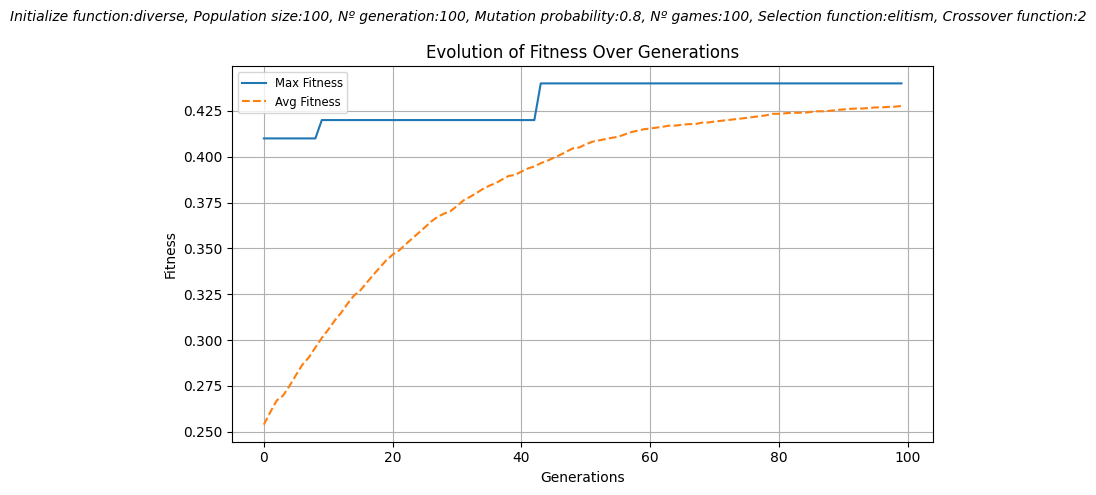

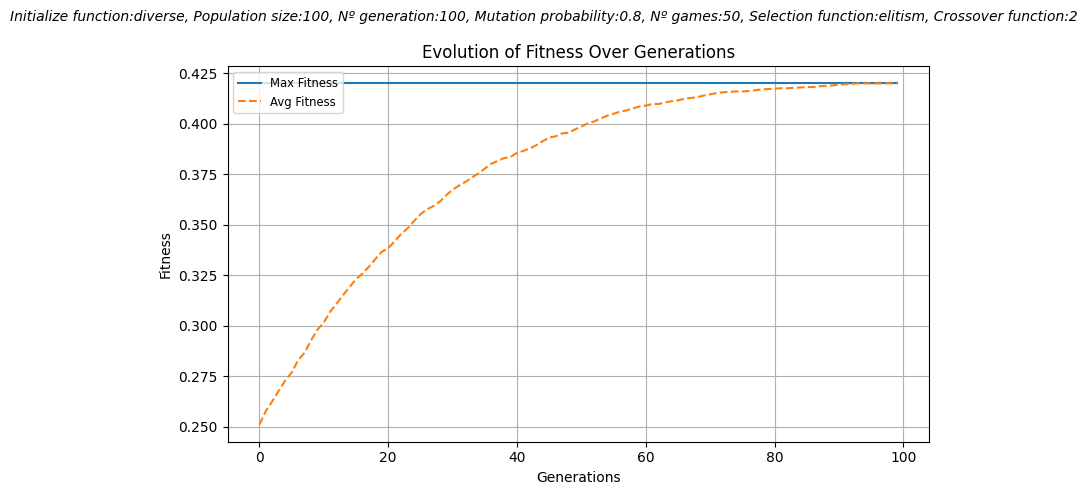

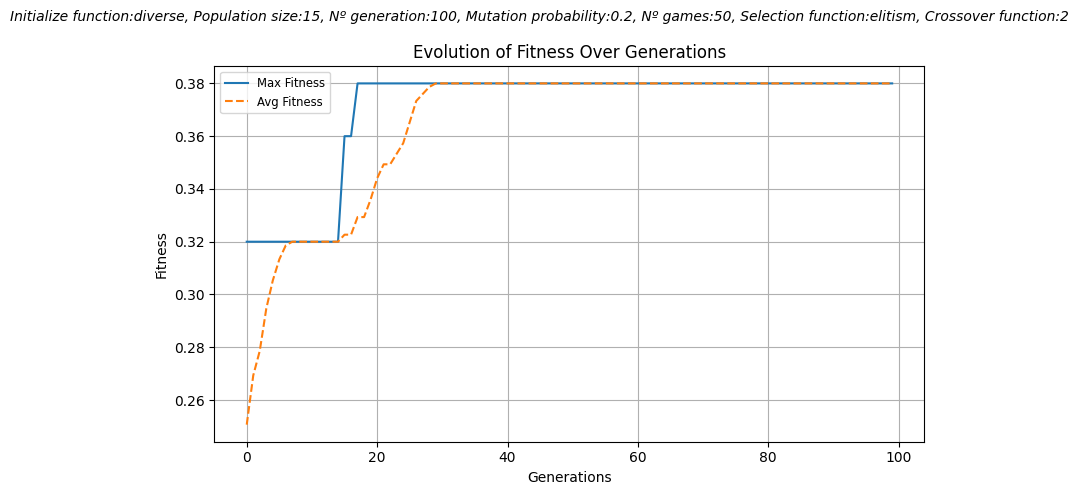

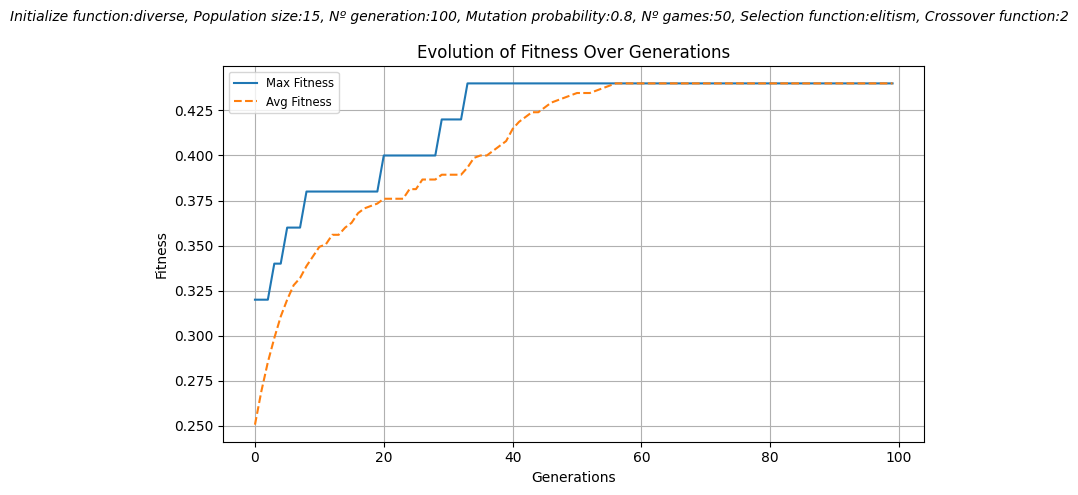

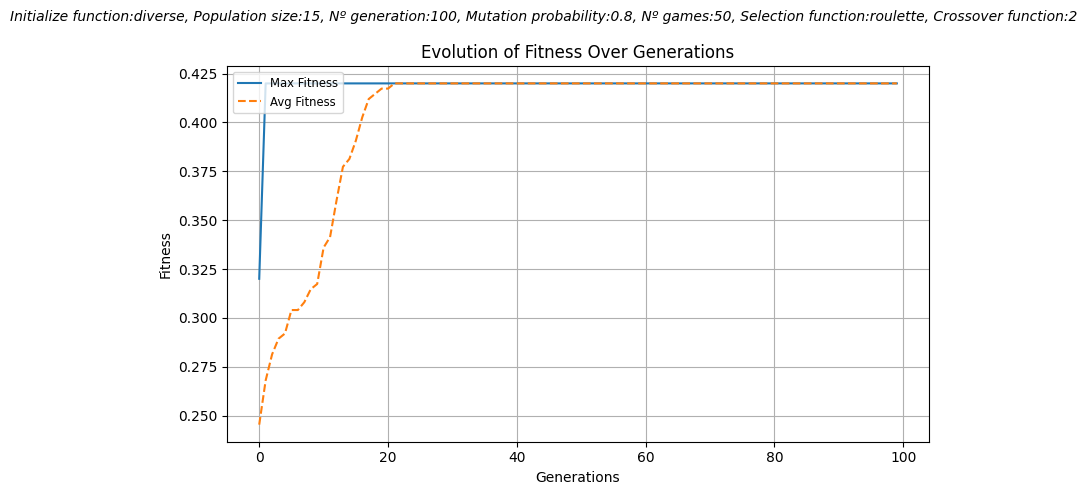

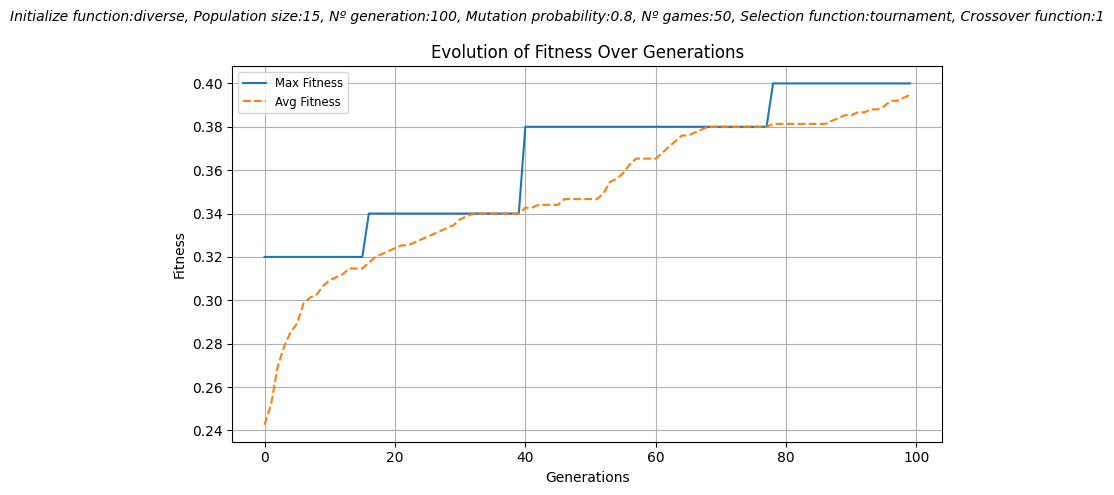

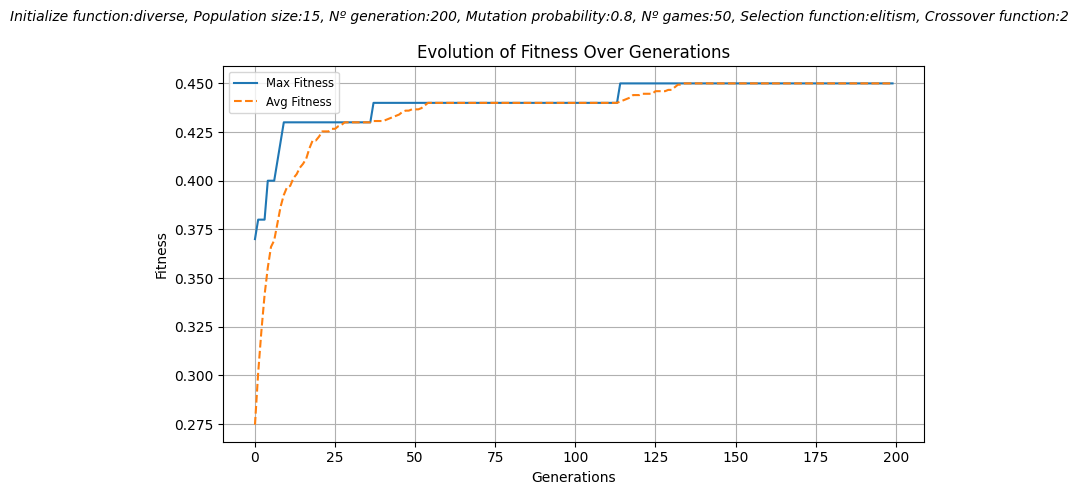

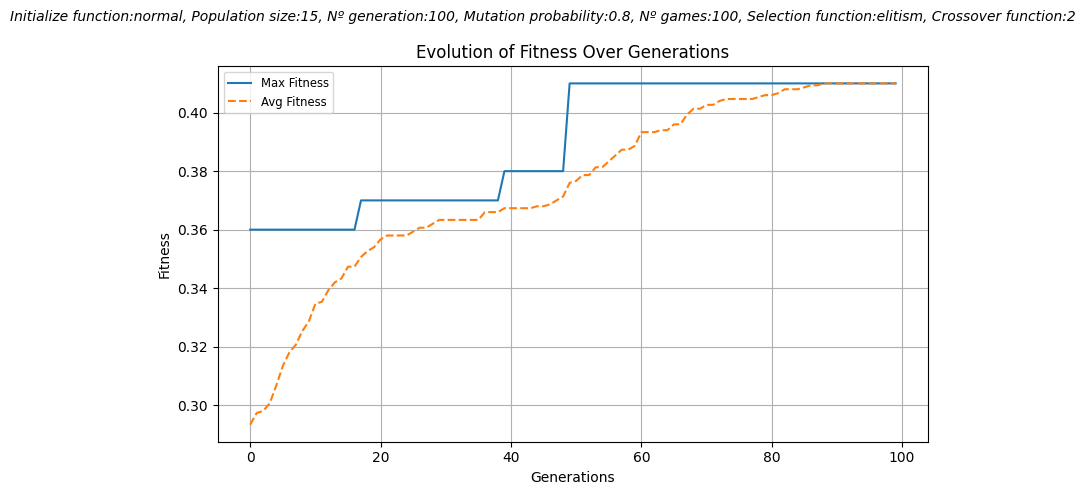

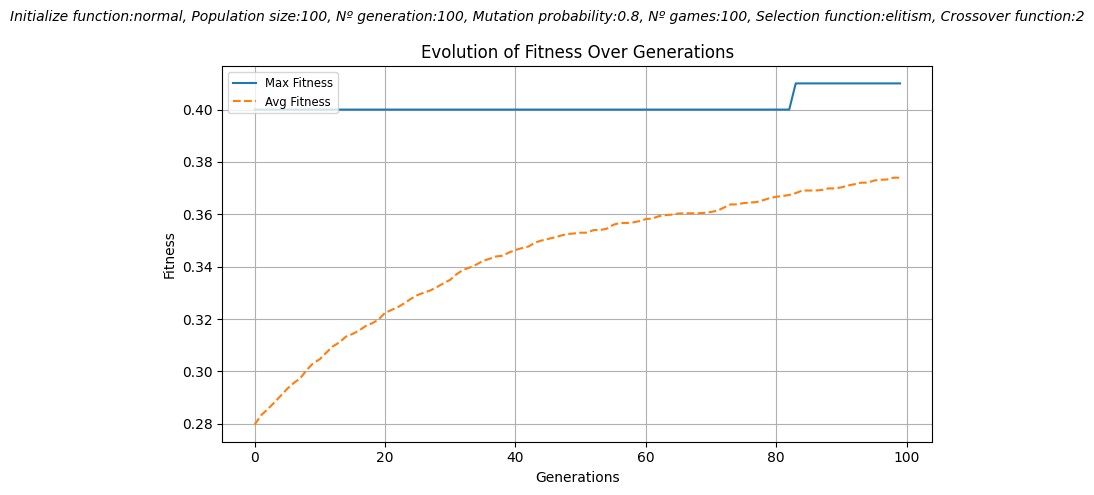

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

csv_files = glob.glob("results_csv/*.csv")

# Iterar sobre los archivos y generar gráficos individuales
for csv_file in csv_files:
    df = pd.read_csv(csv_file)

    if df.empty:
        print(f"El archivo {csv_file} está vacío. Se omite la generación del gráfico.")
        continue 


    # Extraer la configuración del experimento desde el nombre del archivo
    filename = os.path.basename(csv_file)
    config = filename.replace("results_", "Initialize function:")\
                     .replace("_pop", ", Population size:")\
                     .replace("_gen", ", Nº generation:")\
                     .replace("_mut", ", Mutation probability:")\
                     .replace("_games", ", Nº games:")\
                     .replace("_sel", ", Selection function:")\
                     .replace("_cruce", ", Crossover function:")\
                     .replace(".csv", "")

    plt.figure(figsize=(8, 5))

    # Graficar Max Fitness y Avg Fitness
    plt.plot(df["Generation"], df["Max Fitness"], label="Max Fitness", linestyle="-")
    plt.plot(df["Generation"], df["Avg Fitness"], label="Avg Fitness", linestyle="--")

    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("Evolution of Fitness Over Generations")
    plt.suptitle(config, fontsize=10, style='italic') 

    plt.legend(fontsize="small", loc="upper left")
    plt.grid(True)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()


### Identificando en cada experimento el mejor individuo encontrado con su fitness:

In [6]:
import pandas as pd
import glob
import os
import ast

csv_files = glob.glob("results_csv/*.csv")

experiments_summary = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    if df.empty:
        print(f"El archivo {csv_file} está vacío. Se omite el análisis.")
        continue
    
    # Obtener el mejor fitness y el mejor individuo
    best_fitness_idx = df["Max Fitness"].idxmax()
    best_fitness = df.loc[best_fitness_idx, "Max Fitness"]
    best_individual = df.loc[best_fitness_idx, "Best Individual"]
    
    filename = os.path.basename(csv_file)
    config = filename.replace("results_", "Initialize function:")\
                     .replace("_pop", ", Population size:")\
                     .replace("_gen", ", Nº generation:")\
                     .replace("_mut", ", Mutation probability:")\
                     .replace("_games", ", Nº games:")\
                     .replace("_sel", ", Selection function:")\
                     .replace("_cruce", ", Crossover function:")\
                     .replace(".csv", "")
    
    best_individual = ast.literal_eval(best_individual)
    experiments_summary.append((config, best_fitness, best_individual))

for config, fitness, individual in experiments_summary:
    formatted_individual = "[" + ", ".join(f"{float(x):.4f}" for x in individual) + "]"
    print(f"{config} \n -> Best Fitness: {fitness}, Best Individual: {formatted_individual}")

Initialize function:diverse, Population size:100, Nº generation:100, Mutation probability:0.8, Nº games:100, Selection function:elitism, Crossover function:2 
 -> Best Fitness: 0.44, Best Individual: [0.0006, 0.0005, 0.0006, 0.5059, 0.0000, 0.4283, 0.0005, 0.0006, 0.0628, 0.0002]
Initialize function:diverse, Population size:100, Nº generation:100, Mutation probability:0.8, Nº games:50, Selection function:elitism, Crossover function:2 
 -> Best Fitness: 0.42, Best Individual: [0.0001, 0.0011, 0.0007, 0.0004, 0.0007, 0.9941, 0.0010, 0.0008, 0.0007, 0.0004]
Initialize function:diverse, Population size:15, Nº generation:100, Mutation probability:0.2, Nº games:50, Selection function:elitism, Crossover function:2 
 -> Best Fitness: 0.38, Best Individual: [0.0002, 0.0002, 0.0004, 0.5225, 0.0003, 0.0000, 0.0001, 0.4759, 0.0000, 0.0004]
Initialize function:diverse, Population size:15, Nº generation:100, Mutation probability:0.8, Nº games:50, Selection function:elitism, Crossover function:2 
 ->

#### Conclusiones

La configuración que en estos experimentos ha obtenido el mejor fitness es: 
 - Initialize function:diverse, Population size:15, Nº generation:200, Mutation probability:0.8, Nº games:50, Selection function:elitism, Crossover function:2 point 
    - **Best Fitness: 0.45**
    - **Best Individual: [0.0004, 0.0005, 0.0004, 0.1976, 0.6450, 0.1073, 0.0000, 0.0001, 0.0484, 0.0004]**

#### Reflexiones de los hiperparámetros utilizados
A partir de los resultados obtenidos, se pueden extraer varias conclusiones relevantes sobre el impacto de los hiperparámetros en el rendimiento del algoritmo evolutivo:

- **Importancia de la función de inicialización**: Se ha evidenciado que la estrategia de inicialización de la población es un factor determinante en el desempeño del algoritmo. En este caso, **la función que genera individuos más diversos ha logrado mejores resultados** en comparación con una inicialización aleatoria básica. Esto sugiere que una mayor variabilidad en la población inicial favorece la exploración del espacio de soluciones y contribuye a encontrar óptimos de mayor calidad.

- **Tamaño de la población**: Los resultados indican que no es necesario un tamaño de población elevado para alcanzar un buen rendimiento. De hecho, el mejor desempeño se ha obtenido con una población de tan solo **15 individuos**. Este hallazgo es consistente con la teoría que sugiere que el tamaño de la población óptimo debería situarse **entre L y 2L**, donde L representa el tamaño de un individuo. En este caso, dado que L = 10, el intervalo recomendado es entre 10 y 20 individuos, lo cual respalda los resultados experimentales obtenidos.

- **Impacto del número de generaciones**: Un mayor número de generaciones permite que el proceso evolutivo explore de manera más exhaustiva el espacio de búsqueda, favoreciendo la convergencia hacia soluciones de mejor calidad. En este estudio, se ha observado que un valor de **200 generaciones** proporciona un buen equilibrio entre exploración y explotación.

- **Papel de la probabilidad de mutación**: Se ha constatado que un **valor elevado de probabilidad de mutación (como 0.8) ha sido clave** para garantizar una evolución continua de la población. En particular, la estrategia de mutación implementada, caracterizada por su alto grado de diversidad, ha permitido que el fitness mejore de manera progresiva a lo largo de las generaciones. Este resultado resalta la importancia de la mutación como mecanismo de exploración en algoritmos evolutivos.

- **Número de partidas evaluadas**: Para mitigar el sobreajuste a la variabilidad estadística, se ha determinado que un número de partidas **entre 50 y 100 es suficiente** para obtener evaluaciones fiables del rendimiento de los individuos.

- **Estrategia de selección**: Entre las tres funciones de selección implementadas, la estrategia de **elitismo** ha demostrado ser la más eficiente, tanto en términos de calidad de los resultados obtenidos como en tiempo de ejecución. Esto sugiere que retener los mejores individuos en cada generación es una estrategia eficaz para mejorar el fitness global de la población.

- **Método de cruce**: De las dos estrategias de cruce analizadas, la que ha mostrado un mejor desempeño ha sido la de **cruce por dos puntos**. Este resultado es coherente con la estructura del individuo representado como un array, ya que permite una mejor recombinación de las características genéticas, favoreciendo la preservación de patrones beneficiosos y la generación de soluciones más óptimas.